# Loading libraries and data 


In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

market = pd.read_csv("AAPL Historical Data.csv", decimal=",")
market = pd.DataFrame(market)

# Preprocessing data for analysis

In [179]:
# Market first 10 rows
print(market.head(10))

# Market data frame shape
print(market.shape)

# Market data frame types
print(market.dtypes)

         Date   Price    Open    High     Low    Vol. Change %
0  05/01/2023  169.59  169.28  170.45  168.64  49.39M   -0.05%
1  04/28/2023  169.68  168.49  169.85  167.88  55.28M    0.75%
2  04/27/2023  168.41  165.19  168.56  165.19  64.22M    2.84%
3  04/26/2023  163.76  163.05  165.28  162.80  44.11M   -0.01%
4  04/25/2023  163.77  165.19  166.30  163.73  48.17M   -0.94%
5  04/24/2023  165.33  165.00  165.60  163.89  38.99M    0.19%
6  04/21/2023  165.02  165.05  166.45  164.49  58.34M   -0.98%
7  04/20/2023  166.65  166.09  167.87  165.56  52.46M   -0.58%
8  04/19/2023  167.63  165.80  168.16  165.54  47.24M    0.70%
9  04/18/2023  166.47  166.10  167.41  165.65  48.41M    0.75%
(2519, 7)
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [180]:
# Changing col name "Vol." for better view
market = market.rename(columns = {"Vol.":"Vol"})

In [181]:
# Remove all letters in dataframe
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].replace('[^0-9\.]+', '', regex=True)
## Unit M means milion

### Drop also change%
market = market.drop(columns = "Change %")

In [182]:
# Checking for missing values
print(market.isnull().sum().sort_values(ascending=False))

Vol      1
Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [183]:
# Drop missing value
print(market[market["Vol"].isnull()])
market = market.dropna()
print(market.isna().any())


            Date  Price   Open   High    Low  Vol
1806  02/27/2016  96.95  96.95  96.95  96.95  NaN
Date     False
Price    False
Open     False
High     False
Low      False
Vol      False
dtype: bool


In [184]:
print(market.head(10))

         Date   Price    Open    High     Low     Vol
0  05/01/2023  169.59  169.28  170.45  168.64  49.39M
1  04/28/2023  169.68  168.49  169.85  167.88  55.28M
2  04/27/2023  168.41  165.19  168.56  165.19  64.22M
3  04/26/2023  163.76  163.05  165.28  162.80  44.11M
4  04/25/2023  163.77  165.19  166.30  163.73  48.17M
5  04/24/2023  165.33  165.00  165.60  163.89  38.99M
6  04/21/2023  165.02  165.05  166.45  164.49  58.34M
7  04/20/2023  166.65  166.09  167.87  165.56  52.46M
8  04/19/2023  167.63  165.80  168.16  165.54  47.24M
9  04/18/2023  166.47  166.10  167.41  165.65  48.41M


In [185]:
# Convert data
market["Date"] = pd.to_datetime(market["Date"], format='%m/%d/%Y')
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].astype(float)

print(market.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Price   2518 non-null   float64       
 2   Open    2518 non-null   float64       
 3   High    2518 non-null   float64       
 4   Low     2518 non-null   float64       
 5   Vol     2518 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.7+ KB
None


# Desctriptive statistics

In [197]:
print(round(market.drop(columns = ["Date"]).describe(),2))

         Price     Open     High      Low
count  2518.00  2518.00  2518.00  2518.00
mean     66.83    66.78    67.54    66.06
std      50.48    50.43    51.09    49.81
min      14.06    13.98    14.30    13.89
25%      27.86    27.84    28.09    27.46
50%      43.26    43.30    43.70    42.96
75%     118.68   118.70   120.26   116.72
max     182.01   182.63   182.94   179.12


Text(0.5, 1.0, 'Stock Price of Apple over the Years')

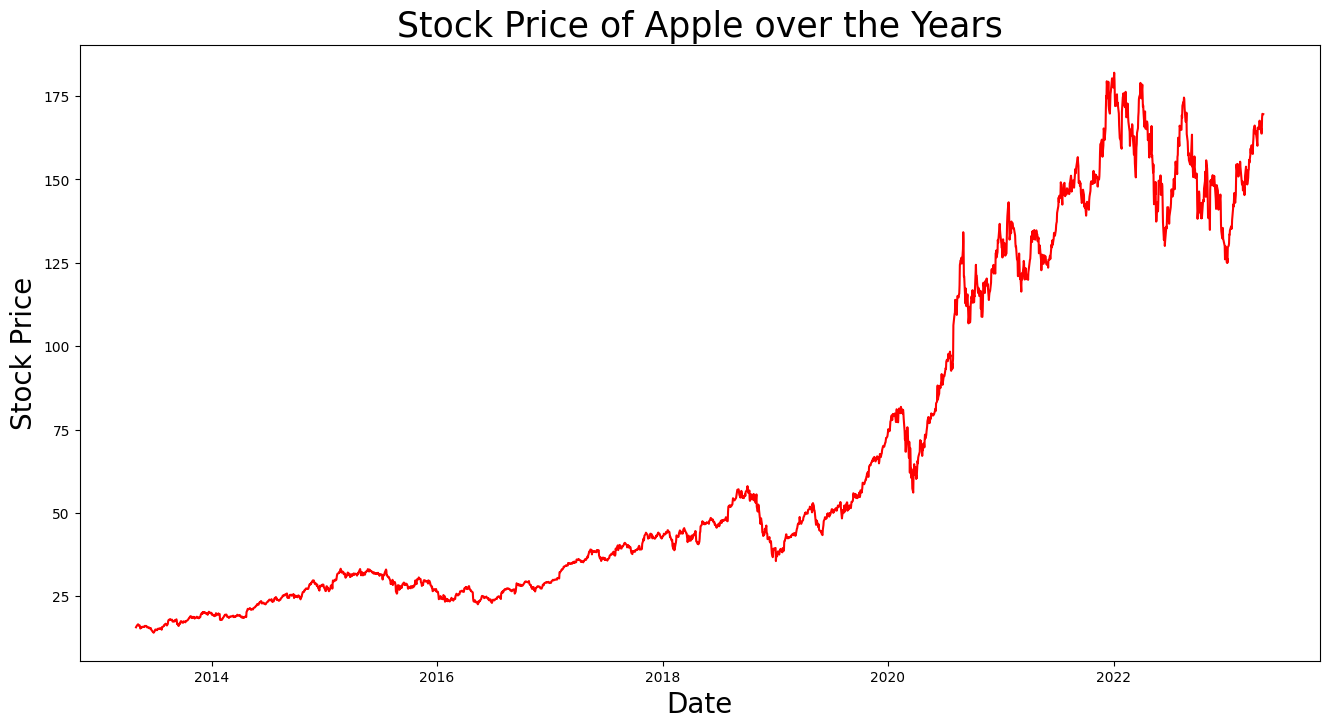

In [192]:
market.index = market['Date']
plt.figure(figsize=(16,8))
plt.plot(market['Price'], label='Price history',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Apple over the Years',size=25)